In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from keras.layers import Dropout
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df=pd.read_csv('data 2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 33)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\prach\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


B    357
M    212
Name: diagnosis, dtype: int64

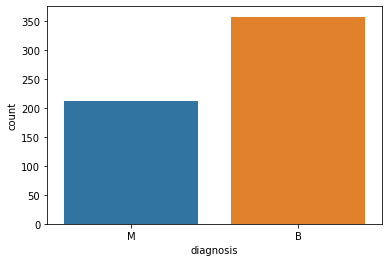

In [8]:
sns.countplot(df.diagnosis,label="Count")
df.diagnosis.value_counts()

In [9]:
x_train, x_test, y_train, y_test=train_test_split(df.drop(['diagnosis'], axis=1),df[['diagnosis']],test_size=0.3,random_state=0)

In [10]:
x_train.shape, y_train.shape

((398, 30), (398, 1))

In [11]:
corrMatrix = x_train.corr()
corrMatrix.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
correlated_features = []
for i in range(len(corrMatrix .columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.85:
            
            correlated_features.append(corrMatrix.columns[i])

In [13]:
x_train.drop(labels=correlated_features, axis=1, inplace=True)
x_test.drop(labels=correlated_features, axis=1, inplace=True)

In [14]:
scaler = preprocessing.StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.transform(x_test))

In [15]:
y_train= y_train.replace({'B':0,'M':1})

# Decision Tree

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier()

In [17]:
y_pred = dtree.predict(x_test)

In [18]:
def conf_matrix(matrix,pred):
    class_names= [0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

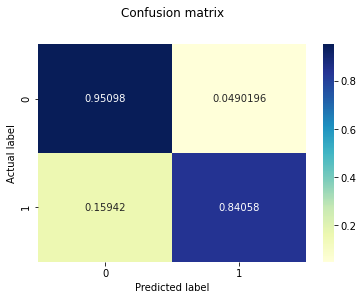

In [19]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test.replace({'B':0,'M':1}),normalize='true')
conf_matrix(cnf_matrix,y_test)

In [20]:
report = classification_report(y_pred,y_test.replace({"B":0,"M":1}))
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       102
           1       0.92      0.84      0.88        69

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



# KNN

<ipython-input-21-3d74475fba8e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-21-3d74475fba8e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-21-3d74475fba8e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-21-3d74475fba8e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-21-3d74475fba8e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Text(0, 0.5, 'precision')

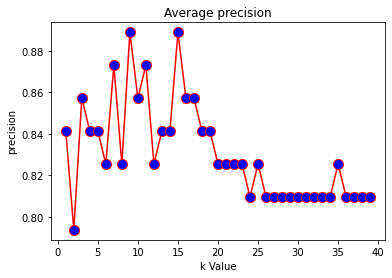

In [21]:
precision=[]

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    preci = precision_score(pd.DataFrame(y_pred),y_test.replace({"B":0,"M":1})["diagnosis"])
    re = recall_score(pd.DataFrame(y_pred),y_test.replace({"B":0,"M":1})["diagnosis"])
   
    precision.append(preci)
precision

plt.plot(range(1, 40),precision, color='red', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Average precision')
plt.xlabel('k Value')
plt.ylabel('precision')
   

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)
report =classification_report(y_pred,y_test.replace({'B':0,'M':1}))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       115
           1       0.86      0.96      0.91        56

    accuracy                           0.94       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



<ipython-input-22-a5f916052867>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
